## Machine Learning A-Z™

© Kirill Eremenko, Hadelin de Ponteves, SuperDataScience Team |
[Super Data Science](http://www.superdatascience.com)

Part 4 Clustering | Section 26: Hierarchical Clustering

Apr  15, 2019
@author: yinka_ola

---
**Data Scenario**

- Client subscribe to a membership card for a mall
- mall has a purchase history for each clients
- mall computed a spending score from 1 to 100 for each client
- segment client into different groups by spending score and annual income
- Predict if user will take up the offer or not
- Find correlation between age, salary and decision to purchase
---

In [14]:
## Hierarchical Clustering (HC):
## cluster is similar to k-means
## 2 types: Agglomerative (focus) and divisive

## Agglomerative Clustering (how to perform):
## step 1: make each data point a single point cluster (forms N clusters)
## Step 2: take the 2 closest data points, and make them 1 cluster (N-1)
## step 3: take the 2 closest clusters (Eucledian), make them 1 cluster (N-1)
## step 4: repeat step 3 untl there is only 1 cluster
## done!

## measuring distance b/t clusters
## option 1: closest points
## option 2: furthest points
## option 3: average distance
## option 4: distance between centroids


## Dendograms:
## HC mantains the memory of  the rocess of crating the final cluster in a dendogram
## the dendogram is the memory of the HC

## Using dendograms to obtain the optimal value
## find the longest vertical line that does not crosses extended the horizontal line


---

In [2]:
# Importing the libraries
import pandas as pd #data
import numpy as np #mathematics
import os
#plotting packages
import matplotlib.pyplot as plt #plotting charts
import seaborn as sns
sns.set()
%matplotlib inline
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Importing the dataset with pandas
dataset = pd.read_csv('Mall_Customers.csv')

#let's explore our dataset
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
#create the independent variable vector (x-value)
x = dataset.iloc[:, [3, 4]].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

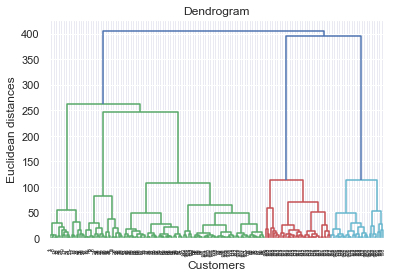

In [8]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [9]:
# Observation: 
## at the very bottom is our customers
## we need to find the optimal number 
## largest vertical distance we make w/o crossing horizontal line
## optimal clusters = 5 => same result as k-means

In [10]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

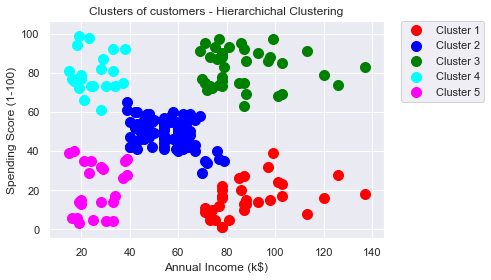

In [11]:
# Visualising the clusters
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers - Hierarchichal Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [12]:
## Observation:
# Cluster 1: High income, but low spending : careful spenders
# Cluster 2: average Income, average spending score: Standard
# Cluster 3: High Income, high spending score: Target for marketing
# Cluster 4: Low Income, high spending score: careless spenders
# Cluster 5: Low Income, low spending score: sensible
# note the volume of points in each clusters for max revenue

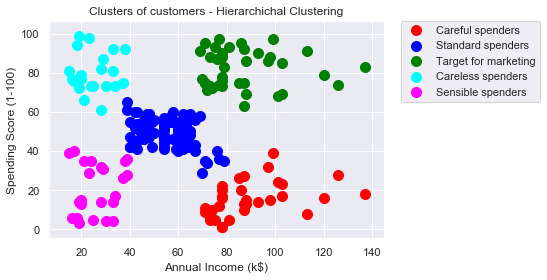

In [13]:
#now relabel the  clusters to the new name

# Visualizing the clusters
#this is only for plotting in 2D
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful spenders')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard spenders')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Target for marketing')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless spenders')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible spenders')
plt.title('Clusters of customers - Hierarchichal Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()